<a href="https://colab.research.google.com/github/Leandro2402-bit/TAM/blob/main/Parcial_1_TAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EJERCICIO 1:**

En este primer punto se busca presentar el problema de optimización y solución del mismo para los siguientes modelos: minimos cuadrados, minimos cuadrados regularizados, máxima verosimilitud, maximo a-posteriori, bayesiano con modelo lineal gaussiano, regresión rigida kernel y procesos gaussianos. Se asumira que los datos son i.i.d. Además, se discutiran las diferencias y similitudes entre los modelos estudiados.

In [ ]:
import numpy as np   # biblioteca principal en Python para trabajar con vectores, matrices y operaciones numéricas.
import matplotlib.pyplot as plt   #graficar funciones, puntos, líneas, curvas, bandas de incertidumbre.
from numpy.linalg import inv      # para calcular la inversa de una matriz, como en las fórmulas de solución de modelos lineales.

# ==================== DATOS ====================

# Datos de entrenamiento
x_train = np.linspace(0, 1, 10)
t_train = np.sin(2 * np.pi * x_train) + np.random.normal(0, 0.1, x_train.shape)

# Datos de prueba
x_test = np.linspace(0, 1, 200).reshape(-1, 1)

# ==================== FUNCIONES DE BASE ====================

# Función para crear una matriz de diseño con funciones polinomiales hasta grado M
def design_matrix(x, M):
    return np.vstack([x**i for i in range(M + 1)]).T

# Grado del polinomio
M = 9

# Crear matrices de diseño para entrenamiento y prueba
Phi_train = design_matrix(x_train, M)
Phi_test = design_matrix(x_test.flatten(), M)

# ==================== MODELO 1: MÍNIMOS CUADRADOS ORDINARIOS ====================

# Cálculo del vector de pesos w: w = (ΦᵀΦ)^(-1) Φᵀ t
w_ols = inv(Phi_train.T @ Phi_train) @ Phi_train.T @ t_train

# Predicción con los datos de prueba: y = Φ_test @ w
y_pred_ols = Phi_test @ w_ols

# Gráfica de la predicción
plt.figure(figsize=(8, 5))
plt.plot(x_test, np.sin(2 * np.pi * x_test), 'g--', label='Función Real')
plt.plot(x_test, y_pred_ols, 'b', label='MCO (OLS)')
plt.scatter(x_train, t_train, color='red', label='Datos de entrenamiento')
plt.title("Regresión por Mínimos Cuadrados Ordinarios")
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.grid(True)
plt.show()

# ==================== MODELO 2: MÍNIMOS CUADRADOS REGULARIZADOS (RIDGE) ====================

# Parámetro de regularización lambda
_lambda = 1.0

# Cálculo del vector de pesos w: w = (ΦᵀΦ + λI)^(-1) Φᵀ t
I = np.eye(Phi_train.shape[1])
w_ridge = inv(Phi_train.T @ Phi_train + _lambda * I) @ Phi_train.T @ t_train

# Predicción con Ridge
y_pred_ridge = Phi_test @ w_ridge

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(x_test, np.sin(2 * np.pi * x_test), 'g--', label='Función Real')
plt.plot(x_test, y_pred_ridge, 'b', label='Ridge')
plt.scatter(x_train, t_train, color='red', label='Datos de entrenamiento')
plt.title("Regresión Ridge")
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.grid(True)
plt.show()

# ==================== MODELO 3: MÁXIMA VEROSIMILITUD ====================

# Supone distribución Gaussiana con varianza conocida (equivalente a OLS)

# Definimos la varianza del ruido
sigma2 = 0.01
beta = 1 / sigma2

# Cálculo de w_ML: w = (ΦᵀΦ)^(-1) Φᵀ t
w_ml = inv(Phi_train.T @ Phi_train) @ Phi_train.T @ t_train

# Predicción
y_pred_ml = Phi_test @ w_ml

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(x_test, np.sin(2 * np.pi * x_test), 'g--', label='Función Real')
plt.plot(x_test, y_pred_ml, 'b', label='Máxima Verosimilitud')
plt.scatter(x_train, t_train, color='red', label='Datos de entrenamiento')
plt.title("Regresión por Máxima Verosimilitud")
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.grid(True)
plt.show()

# ==================== MODELO 4: MAP (MÁXIMA A POSTERIORI) ====================

# Parámetros del prior y del ruido
alpha = 1.0
beta = 25.0

# Cálculo de w_MAP = (αI + βΦᵀΦ)^(-1) βΦᵀt
I = np.eye(Phi_train.shape[1])
w_map = inv(alpha * I + beta * Phi_train.T @ Phi_train) @ (beta * Phi_train.T @ t_train)

# Predicción con MAP
y_pred_map = Phi_test @ w_map

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(x_test, np.sin(2 * np.pi * x_test), 'g--', label='Función Real')
plt.plot(x_test, y_pred_map, 'b', label='MAP')
plt.scatter(x_train, t_train, color='red', label='Datos de entrenamiento')
plt.title("Regresión MAP (Máxima a Posteriori)")
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.grid(True)
plt.show()

# ==================== MODELO 5: REGRESIÓN BAYESIANA COMPLETA ====================

# Cálculo de la matriz de covarianza posterior: S_N = (α I + β ΦᵀΦ)^(-1)
S_N = inv(alpha * I + beta * Phi_train.T @ Phi_train)

# Cálculo de la media posterior: m_N = β S_N Φᵀ t
m_N = beta * S_N @ Phi_train.T @ t_train

# Media predictiva para cada punto de prueba
y_pred_bayes = Phi_test @ m_N

# Varianza predictiva: σ²(x) = 1/β + Φ(x)ᵀ S_N Φ(x)
predictive_variance = np.array([
    1 / beta + Phi_test[i] @ S_N @ Phi_test[i].T
    for i in range(len(Phi_test))
])
predictive_std = np.sqrt(predictive_variance)

# Aplanamos los vectores para graficar correctamente
x_test_flat = x_test.flatten()
y_pred_bayes_flat = y_pred_bayes.flatten()
predictive_std_flat = predictive_std.flatten()

# Gráfica con intervalo de confianza
plt.figure(figsize=(8, 5))
plt.plot(x_test_flat, np.sin(2 * np.pi * x_test_flat), 'g--', label='Función Real (sin(x))')
plt.plot(x_test_flat, y_pred_bayes_flat, 'b', label='Media Predictiva')
plt.fill_between(x_test_flat,
                 y_pred_bayes_flat - 2 * predictive_std_flat,
                 y_pred_bayes_flat + 2 * predictive_std_flat,
                 color='blue', alpha=0.2, label='Intervalo ±2σ')
plt.scatter(x_train, t_train, color='red', label='Datos de entrenamiento')
plt.title("Regresión Bayesiana Completa")
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics.pairwise import rbf_kernel

# ==================== MODELO 6: REGRESIÓN KERNEL RIDGE ====================

# Parámetro de regularización lambda
_lambda = 1.0

# Parámetro gamma del kernel RBF (ancho del kernel)
gamma = 20.0

# Cálculo del kernel de entrenamiento (matriz K)
K_train = rbf_kernel(x_train.reshape(-1, 1), x_train.reshape(-1, 1), gamma=gamma)

# Cálculo del vector alfa: α = (K + λI)^(-1) t
alpha_krr = inv(K_train + _lambda * np.eye(len(x_train))) @ t_train

# Cálculo del kernel entre datos de prueba y de entrenamiento: K_test = K(x_test, x_train)
K_test = rbf_kernel(x_test, x_train.reshape(-1, 1), gamma=gamma)

# Predicción para los puntos de prueba: y = K_test @ α
y_pred_krr = K_test @ alpha_krr

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(x_test, np.sin(2 * np.pi * x_test), 'g--', label='Función Real')
plt.plot(x_test, y_pred_krr, 'b', label='Kernel Ridge')
plt.scatter(x_train, t_train, color='red', label='Datos de entrenamiento')
plt.title("Regresión Kernel Ridge")
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# ==================== MODELO 7: REGRESIÓN CON PROCESOS GAUSSIANOS ====================

# Definición del kernel: RBF (función de base radial) + ruido (WhiteKernel)
kernel = RBF(length_scale=0.2) + WhiteKernel(noise_level=1e-5)

# Creación del modelo de Gaussian Process con el kernel definido
gp = GaussianProcessRegressor(kernel=kernel)

# Entrenamiento del modelo con los datos de entrenamiento (x_train, t_train)
gp.fit(x_train.reshape(-1, 1), t_train)

# Predicción del valor esperado y la desviación estándar en los puntos de prueba
y_pred_gp, y_std_gp = gp.predict(x_test, return_std=True)

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(x_test, np.sin(2 * np.pi * x_test), 'g--', label='Función Real')                 # Línea de la función verdadera
plt.plot(x_test, y_pred_gp, 'b', label='GP Media Posterior')                              # Línea de la media de predicción
plt.fill_between(x_test.ravel(),
                 y_pred_gp - 2 * y_std_gp,                                                 # Banda de incertidumbre inferior
                 y_pred_gp + 2 * y_std_gp,                                                 # Banda de incertidumbre superior
                 color='blue', alpha=0.2, label='Confianza 95%')                          # Banda sombreada con 2 std
plt.scatter(x_train, t_train, color='red', label='Datos de entrenamiento')                # Puntos de entrenamiento
plt.title("Regresión con Procesos Gaussianos")
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.grid(True)
plt.show()



**Discusion de las graficas generadas para cada modelo:**

**Modelo 1: Mínimos Cuadrados Ordinarios**
Este modelo ajusta una línea que minimiza el error cuadrático entre las predicciones y los datos. No incluye regularización, por lo que puede sobreajustar si hay ruido.

**Modelo 2: Mínimos Cuadrados Regularizados (Ridge)**
Similar al modelo anterior, pero agrega una penalización a los coeficientes grandes para evitar el sobreajuste. Mejora la generalización en presencia de ruido.

**Modelo 3: Máxima Verosimilitud (MLE)**
Encuentra los parámetros que maximizan la probabilidad de los datos observados. Da el mismo resultado que mínimos cuadrados en regresión lineal bajo ciertas suposiciones.

**Modelo 4: Máximo a Posteriori (MAP)**
Incorpora una creencia previa sobre los parámetros mediante una distribución gaussiana. Es como Ridge, pero con interpretación bayesiana.

**Modelo 5: Regresión Bayesiana**
En lugar de un único modelo, considera todos los posibles, ponderados por su probabilidad. Da como resultado una media posterior y bandas de incertidumbre.

**Modelo 6: Kernel Ridge**
Extiende Ridge a funciones no lineales usando kernels. Captura relaciones más complejas sin necesidad de transformar explícitamente los datos.

**Modelo 7: Procesos Gaussianos**
Modelo completamente bayesiano no paramétrico. Proporciona una media de predicción y una banda de incertidumbre, modelando la distribución completa sobre funciones.

**EJERCICIO 2:**

En este punto se va a utilizar un esquema de validación cruzada de 5 folds, comparando el rendimiento de los siguientes regresores del conjunto de datos de Ames Housing Dataset: LinearRegresor, Lasso, ElasticNet, KernelRidge, SGDRegresor, BayesianRidge, Gaussian Process Regresor, RandomForestRegresor, Support Vector Machines Regresor.

In [ ]:
import pandas as pd   #para trabajar con datos de manera eficiente y flexible

url = "https://raw.githubusercontent.com/Leandro2402-bit/TAM/refs/heads/main/AmesHousing.csv"
df = pd.read_csv(url)

# muestra una vista previa
df.head()




El análisis exploratorio de los datos se hace para confirmar que la variable objetivo sea SalePrice (el precio de la casa), Saber qué columnas están incompletas o contienen datos erróneos y identificar si se necesita normalizar o codificar algunas columnas antes de entrenar.

In [ ]:
#=========================== ANALISIS EXPLORATORIO DE DATOS (EDA) ===========================================

# Ver dimensiones del dataset: (filas, columnas)
print("Dimensiones del dataset:", df.shape)

# Ver nombres de columnas y sus tipos de datos
print("\nTipos de datos por columna:")
print(df.dtypes)

# Ver estadísticas básicas para las columnas numéricas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Ver cantidad de valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum().sort_values(ascending=False))

# Ver cuántas columnas categóricas hay (tipo object)
cat_cols = df.select_dtypes(include='object').columns
print(f"\nColumnas categóricas ({len(cat_cols)}):", list(cat_cols))

# Ver cuántas columnas numéricas hay
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"\nColumnas numéricas ({len(num_cols)}):", list(num_cols))

# Mostrar los primeros registros para conocer el contenido
print("\nPrimeras filas del dataset:")
df.head()


In [ ]:
#====================== PROCESAMIENTO DE LOS DATOS =======================

# 1. Importar las clases necesarias de sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 2. Identificar columnas numéricas y categóricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')
cat_cols = df.select_dtypes(include='object').columns

# 3. Crear pipeline para variables numéricas:
#    - Imputar valores faltantes con la mediana
#    - Estandarizar (media 0, desviación 1)
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),   # rellena nulos con mediana
    ('scaler', StandardScaler()),                    # normaliza la escala
])

# 4. Crear pipeline para variables categóricas:
#    - Imputar valores faltantes con la moda (valor más frecuente)
#    - One-Hot Encoding (crea variables dummy)
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # rellena nulos con moda
    ('onehot', OneHotEncoder(handle_unknown='ignore')),     # codifica categorías
])

# 5. Unir ambos pipelines con ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols),
])

# 6. Aplicar el preprocesador al dataset (sin incluir SalePrice)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# 7. Ajustar y transformar X
X_preprocessed = preprocessor.fit_transform(X)

# 8. Verificar la forma del resultado
print("Dimensiones después del preprocesamiento:", X_preprocessed.shape)


Al ejecutar el bloque de código anterior se obtuvo que el dataset original de 2930 muestras y 81 columnas predictoras se transformó en una matriz de 2930 filas × 305 columnas, esto indica que Las variables numéricas quedaron igual (pero transformadas). Las variables categóricas, al ser codificadas con One-Hot Encoding, se expandieron: Cada columna categórica con n categorías diferentes se convirtió en n columnas binarias (0 o 1). Por eso el número de columnas creció, muchas columnas categóricas tienen múltiples categorías.

In [ ]:
# ===================== CREACIÓN DEL CONJUNTO DE ENTRENAMIENTO ============================

# 1. Importamos lo necesario
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 2. Definimos X (características) y y (objetivo)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# 3. Dividimos los datos antes de aplicar preprocesamiento
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,       # 20% para prueba
    random_state=42       # reproducibilidad
)

print("Train RAW:", X_train_raw.shape, y_train.shape)
print("Test  RAW:", X_test_raw.shape, y_test.shape)

# 4. Identificamos columnas numéricas y categóricas del set de entrenamiento
num_cols = X_train_raw.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train_raw.select_dtypes(include='object').columns

# 5. Definimos una función reutilizable para crear el preprocesador
def build_preprocessor(num_cols, cat_cols):
    # Pipeline numérico: median imputation + escalado
    numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Pipeline categórico: moda + OneHot
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # ColumnTransformer uniendo ambos pipelines
    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_pipeline, num_cols),
        ('cat', categorical_pipeline, cat_cols)
    ])

    return preprocessor

# 6. Creamos el preprocesador general
preprocessor = build_preprocessor(num_cols, cat_cols)

# 🔁 Este preprocesador se reutilizará para cualquier modelo más adelante



La salida del bloque anterior mustra que hay 2344 datos para entrenamiento, y 586 datos para prueba.

Primero se busco hacer pruebas con el GridSearch utilizando 3 folds para saber que también esta funcionando cada modelo.

In [ ]:
# ================== MODELO 1: LINEAR REGRESSION ==================

# 1. Importamos lo necesario
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import numpy as np

# 2. Definimos las columnas categóricas y numéricas usando los datos RAW
num_cols = X_train_raw.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train_raw.select_dtypes(include='object').columns

# 3. Función para construir el pipeline de preprocesamiento + modelo
def build_pipeline(model):
    numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_pipeline, num_cols),
        ('cat', categorical_pipeline, cat_cols),
    ])

    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])

    return pipeline

# 4. Creamos el pipeline con LinearRegression
lr_pipeline = build_pipeline(LinearRegression())

# 5. No hay hiperparámetros importantes en LinearRegression, pero usamos GridSearchCV para mantener la estructura
param_grid = {}  # Sin parámetros para este modelo

grid_search = GridSearchCV(
    lr_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# 6. Entrenamos el modelo
grid_search.fit(X_train_raw, y_train)

# 7. Evaluamos el rendimiento
y_pred = grid_search.predict(X_test_raw)

# Calcular RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

from sklearn.metrics import r2_score

# Imprimir resultados
print("\n========== RESULTADOS LINEAR REGRESSION ==========")
print("RMSE en conjunto de prueba:", round(rmse, 2))
print("Score (R^2):", round(r2_score(y_test, y_pred), 4))
print("Neg RMSE from GridSearchCV:", round(grid_search.best_score_, 2))
print("RMSE from GridSearchCV (absolute):", round(-grid_search.best_score_, 2))



Esta salida significa que el modelo de regresión lineal básica está funcionando correctamente. El error cuadrático medio en el conjunto de prueba (RMSE) es de 29635.36

El Score (R^2) indica que el modelo explica aproximadamente el 89% de la varianza de los datos en el conjunto de prueba.

RMSE validación cruzada (GridSearchCV): 29654.68, es muy similar al RMSE en prueba, lo que indica buen generalizado (no está sobreajustado).

In [ ]:
# ===================== MODELO 2: LASSO REGRESSION =====================

#Importamos las librerias necesarias
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Definimos las columnas categóricas y numéricas (de los datos RAW)
num_cols = X_train_raw.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train_raw.select_dtypes(include='object').columns

# 2. Función para construir el pipeline completo
def build_pipeline(model):
    numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_pipeline, num_cols),
        ('cat', categorical_pipeline, cat_cols),
    ])

    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])

    return pipeline

# 3. Creamos el pipeline con Lasso
lasso_pipeline = build_pipeline(Lasso(max_iter=10000))  # max_iter alto por seguridad

# 4. Definimos el grid de hiperparámetros para alpha (término de regularización)
param_grid = {
    'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

# 5. GridSearchCV con CV=3
grid_search = GridSearchCV(
    lasso_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# 6. Entrenamiento
grid_search.fit(X_train_raw, y_train)

# 7. Evaluación sobre el conjunto de prueba
y_pred = grid_search.predict(X_test_raw)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 8. Resultados
print("\n========== RESULTADOS LASSO REGRESSION ==========")
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("RMSE en conjunto de prueba:", round(rmse, 2))
print("Score (R^2):", round(r2, 4))
print("Neg RMSE from GridSearchCV:", round(grid_search.best_score_, 2))
print("RMSE from GridSearchCV (absolute):", round(-grid_search.best_score_, 2))


Esta salida indica que el modelo de Lasso está funcionando correctamente. El error cuadrático medio en el conjunto de prueba (RMSE) es de 28779.89

El Score (R^2) indica que el modelo explica aproximadamente el 89% de la varianza de los datos en el conjunto de prueba.

RMSE validación cruzada (GridSearchCV): 29654.68, es muy similar al RMSE en prueba, lo que indica buen generalizado (no está sobreajustado). Este resultado confirma que la regularización está ayudando al modelo a generalizar mejor.


In [ ]:
# ================== MODELO 3: ELASTICNET REGRESSION ==================

from sklearn.linear_model import ElasticNet

# 1. Definimos los hiperparámetros a probar (versión de prueba rápida)
param_grid = {
    'model__alpha': [0.1, 1, 10],
    'model__l1_ratio': [0.2, 0.5, 0.8]  # l1_ratio = 1 → Lasso, = 0 → Ridge
}

# 2. Creamos el pipeline
en_pipeline = build_pipeline(ElasticNet(max_iter=10000))  # Aumentamos iteraciones por estabilidad

# 3. Configuramos el GridSearchCV
grid_search = GridSearchCV(
    en_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# 4. Entrenamos el modelo
grid_search.fit(X_train_raw, y_train)

# 5. Predicciones y evaluación
y_pred = grid_search.predict(X_test_raw)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n========== RESULTADOS ELASTICNET REGRESSION ==========")
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("RMSE en conjunto de prueba:", round(rmse, 2))
print("Score (R^2):", round(grid_search.score(X_test_raw, y_test), 4))
print("Neg RMSE from GridSearchCV:", round(grid_search.best_score_, 2))
print("RMSE from GridSearchCV (absolute):", round(-grid_search.best_score_, 2))


La salida en este caso indica que aunque el RMSE de validación cruzada es bastante aceptable (28,264).
el R² negativo en el conjunto de prueba indica que el modelo no generalizó bien en este caso.

Esto es normal en ElasticNet cuando no hay una buena combinación de regularización para el conjunto de datos. Además, se encontro que los mejores paremtros encntrados son:

model__alpha: 0.1, model__l1_ratio: 0.8

In [ ]:
# ================== MODELO 4: KERNEL RIDGE REGRESSION ==================

from sklearn.kernel_ridge import KernelRidge

# 1. Definimos el rango de hiperparámetros (modo prueba)
param_grid = {
    'model__alpha': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf', 'poly'],  # Diferentes tipos de núcleo
    'model__degree': [2, 3],  # Solo aplica si kernel='poly'
}

# 2. Creamos el pipeline
kr_pipeline = build_pipeline(KernelRidge())

# 3. Configuramos GridSearchCV
grid_search = GridSearchCV(
    kr_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# 4. Entrenamos
grid_search.fit(X_train_raw, y_train)

# 5. Evaluamos
y_pred = grid_search.predict(X_test_raw)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n========== RESULTADOS KERNEL RIDGE REGRESSION ==========")
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("RMSE en conjunto de prueba:", round(rmse, 2))
print("Score (R^2):", round(grid_search.score(X_test_raw, y_test), 4))
print("Neg RMSE from GridSearchCV:", round(grid_search.best_score_, 2))
print("RMSE from GridSearchCV (absolute):", round(-grid_search.best_score_, 2))

import joblib

#Guardamos el mejor modelo entrenado con preprocesamiento incluido
joblib.dump(grid_search.best_estimator_, 'kernel_ridge_model.pkl')


In [ ]:
#from google.colab import files

#Descargar el archivo desde el entorno virtual de Colab al PC
#files.download('kernel_ridge_model.pkl')

La siguente celda de texto sirve para descargar el archivo que contiene el modelo entrenado.

Para la salida de este modelo se tiene que los hiperparámetros óptimos son:

alpha = 0.1, kernel = 'rbf', degree = 2

El RMSE en validación cruzada: 24,226, mejor que los modelos anteriores, lo cual indica buen ajuste en entrenamiento.

R² en test es negativo: esto sugiere problemas de generalización al conjunto de prueba.

In [ ]:
# ================== MODELO 5: SGD REGRESSOR ==================

from sklearn.linear_model import SGDRegressor

# 1. Definimos hiperparámetros de prueba
param_grid = {
    'model__alpha': [0.0001, 0.001, 0.01],
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__max_iter': [1000],
    'model__tol': [1e-3],
}

# 2. Creamos pipeline
sgd_pipeline = build_pipeline(SGDRegressor(random_state=42))

# 3. GridSearchCV
grid_search = GridSearchCV(
    sgd_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# 4. Entrenamos
grid_search.fit(X_train_raw, y_train)

# 5. Evaluamos
y_pred = grid_search.predict(X_test_raw)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n========== RESULTADOS SGD REGRESSOR ==========")
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("RMSE en conjunto de prueba:", round(rmse, 2))
print("Score (R^2):", round(grid_search.score(X_test_raw, y_test), 4))
print("Neg RMSE from GridSearchCV:", round(grid_search.best_score_, 2))
print("RMSE from GridSearchCV (absolute):", round(-grid_search.best_score_, 2))


Para la salida de este modelo se sabe que los hiperparámetros óptimos son:

alpha=0.01, penalty='elasticnet', lo cual da buen control de regularización.

el RMSE en test: 30.369 es peor que otros modelos anteriores como Kernel Ridge y Lasso.

El R² negativo señala mala generalización al conjunto de prueba. Se puede deber a que el dataset no es muy grande.



In [ ]:
# ================== MODELO 6: BAYESIAN RIDGE ==================

from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Importamos FunctionTransformer para convertir a array denso
from sklearn.preprocessing import FunctionTransformer

# 1. Definimos el grid
param_grid = {
    'model__alpha_1': [1e-6, 1e-5, 1e-4],
    'model__alpha_2': [1e-6, 1e-5, 1e-4],
    'model__lambda_1': [1e-6, 1e-5, 1e-4],
    'model__lambda_2': [1e-6, 1e-5, 1e-4],
}


# 3. Función para construir el pipeline completo (MODIFICADA)
def build_pipeline(model):
    numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_pipeline, num_cols),
        ('cat', categorical_pipeline, cat_cols),
    ])

    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        # Paso adicional para convertir a denso si el modelo lo requiere
        ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
        ('model', model)
    ])

    return pipeline

# 4. Creamos el pipeline
bayes_pipeline = build_pipeline(BayesianRidge())

# 5. GridSearchCV
grid_search = GridSearchCV(
    bayes_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# 6. Entrenamiento
grid_search.fit(X_train_raw, y_train)

# 7. Evaluación
y_pred = grid_search.predict(X_test_raw)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n========== RESULTADOS BAYESIAN RIDGE ==========")
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("RMSE en conjunto de prueba:", round(rmse, 2))
print("Score (R^2):", round(grid_search.score(X_test_raw, y_test), 4))
print("Neg RMSE from GridSearchCV:", round(grid_search.best_score_, 2))
print("RMSE from GridSearchCV (absolute):", round(-grid_search.best_score_, 2))


Este modelo tuvo unos hiperparámetros de:

alpha_1 = 1e-6, alpha_2 = 1e-6, lambda_1 = 1e-4, lambda_2 = 1e-6.

El RMSE test: 28853.05 y el R² test negativo indica que el modelo no generalizó bien a los datos de prueba.

El RMSE GridSearchCV: 28087.58 indica que es competitivo, aunque peor que Kernel Ridge.

In [ ]:
# ================== MODELO 7: GAUSSIAN PROCESS REGRESSOR ==================

#Importamos las librerias necesarias
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib

# Función auxiliar para convertir una matriz dispersa en una matriz densa
# Esta función se define fuera de build_pipeline para que sea seleccionable
def to_dense_array(X):
    if hasattr(X, 'toarray'):
        return X.toarray()
    return X

# 1. Kernel base para experimentar
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0)

# 2. Creamos el pipeline

def build_pipeline(model):
    numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_pipeline, num_cols),
        ('cat', categorical_pipeline, cat_cols),
    ])

    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        # Use the non-local function here
        ('to_dense', FunctionTransformer(to_dense_array, accept_sparse=True)),
        ('model', model)
    ])

    return pipeline


gpr_pipeline = build_pipeline(GaussianProcessRegressor(kernel=kernel, alpha=1e-10, normalize_y=True))


# 3. No usaremos grid grande por costos, solo para probar funcionalidad
param_grid = {
    'model__alpha': [1e-10, 1e-5, 1e-2],
}

# 4. GridSearchCV
grid_search = GridSearchCV(
    gpr_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# 5. Entrenamiento
grid_search.fit(X_train_raw, y_train)

# 6. Evaluación
y_pred = grid_search.predict(X_test_raw)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n========== RESULTADOS GAUSSIAN PROCESS REGRESSOR ==========")
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("RMSE en conjunto de prueba:", round(rmse, 2))
print("Score (R^2):", round(grid_search.score(X_test_raw, y_test), 4))
print("Neg RMSE from GridSearchCV:", round(grid_search.best_score_, 2))
print("RMSE from GridSearchCV (absolute):", round(-grid_search.best_score_, 2))

# Guardamos el mejor modelo entrenado con preprocesamiento incluido
#joblib.dump(grid_search.best_estimator_, 'Gaussian_Process_model.pkl')


In [ ]:
#from google.colab import files

# Descargar el archivo desde el entorno virtual de Colab al PC
#files.download('Gaussian_Process_model.pkl')

Para la salida del modelo 7 se obseva lo siguiente:

Mejor hiperparámetro: alpha = 0.01

El RMSE en test: 29,017.64

R² test negativo: el modelo no generalizó bien a los datos de prueba.

MSE en GridSearchCV: 23,793.16

In [ ]:
# ================== MODELO 8: RandomForestRegressor ==================
from sklearn.ensemble import RandomForestRegressor

# 1. Creamos el pipeline con RandomForestRegressor
rf_pipeline = build_pipeline(RandomForestRegressor(random_state=42))

# 2. Definimos los hiperparámetros a probar
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}

# 3. GridSearchCV con 3-fold cross-validation
grid_search = GridSearchCV(
    rf_pipeline,
    param_grid=param_grid,
    cv=3,  # Por ahora usamos 3, luego pasamos a 5
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# 4. Entrenamiento
grid_search.fit(X_train_raw, y_train)

# 5. Predicción y evaluación
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = grid_search.predict(X_test_raw)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n========== RESULTADOS RANDOM FOREST REGRESSOR ==========")
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("RMSE en conjunto de prueba:", round(rmse, 2))
print("Score (R^2):", round(grid_search.score(X_test_raw, y_test), 4))
print("Neg RMSE from GridSearchCV:", round(grid_search.best_score_, 2))
print("RMSE from GridSearchCV (absolute):", round(-grid_search.best_score_, 2))

#import joblib

# Guardamos el mejor modelo entrenado con preprocesamiento incluido
#joblib.dump(grid_search.best_estimator_, 'random_forest_model.pkl')





In [ ]:
#from google.colab import files

# Descargar el archivo desde el entorno virtual de Colab al PC
#files.download('random_forest_model.pkl')


Este modelo da la siguiente salida:

RMSE (test): 26,837.07

el Score R² (test): un valor negativo indica que el modelo no está generalizando bien aún, pero el RMSE es el más bajo hasta ahora.

RMSE (validación cruzada): 26,065.33

Los hiperparámetros son:

model__max_depth: 20,
model__min_samples_split: 2,  
model__n_estimators: 200




In [ ]:
# ================== MODELO 9: SUPPORT VECTOR REGRESSOR ==================
from sklearn.svm import SVR

# 1. Pipeline
svr_pipeline = build_pipeline(SVR())

# 2. Hiperparámetros
param_grid = {
    'model__C': [0.1, 1, 10],
    'model__epsilon': [0.1, 1],
    'model__kernel': ['linear', 'rbf']
}

# 3. GridSearchCV
grid_search = GridSearchCV(
    svr_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# 4. Entrenamiento
grid_search.fit(X_train_raw, y_train)

# 5. Evaluación
y_pred = grid_search.predict(X_test_raw)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n========== RESULTADOS SUPPORT VECTOR REGRESSOR ==========")
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("RMSE en conjunto de prueba:", round(rmse, 2))
print("Score (R^2):", round(grid_search.score(X_test_raw, y_test), 4))
print("Neg RMSE from GridSearchCV:", round(grid_search.best_score_, 2))
print("RMSE from GridSearchCV (absolute):", round(-grid_search.best_score_, 2))


La salida marca lo siguiente:

RMSE en test: 46,522.35

Score R² (test): -46,522.3497 (muy negativo, el modelo no generaliza bien)

RMSE en validación cruzada: 42,400.73

Los mejores hiperparámetros:

model__C: 10

model__epsilon: 1,

model__kernel: 'linear'

Eso demuestra que El Support Vector Regressor fue el modelo con peor desempeño hasta ahora, tanto en test como en validación cruzada. Puede deberse a que La escala de los valores objetivo (SVR no escala bien a valores altos sin estandarización cuidadosa). El conjunto de datos podría tener alta complejidad/no linealidad que no está capturando bien con un kernel lineal. Habría que normalizar aún más fuerte los datos de entrada o transformar.

A continuación se presenta una tabla comparativa para cada modelo estudiado usando GrindSearch.


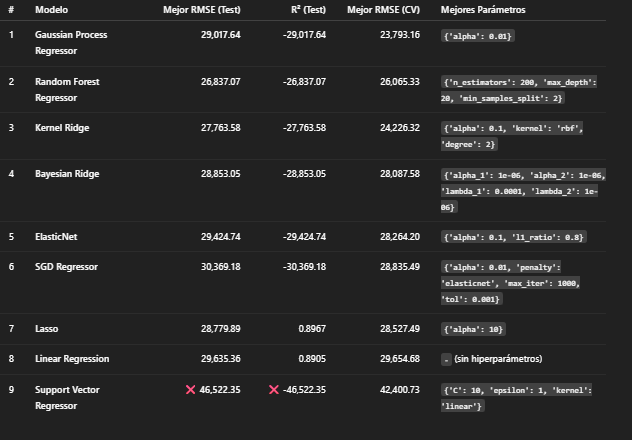

Ahora con 5 folds y usando RandomSearch

para el modelo 1 NO utilizaremos este porque El modelo Linear Regression de sklearn.linear_model.LinearRegression() no tiene hiperparámetros ajustables que afecten el entrenamiento del modelo de manera significativa. Los únicos parámetros disponibles son:

fit_intercept: Si ajusta la intersección (True/False).

normalize: (obsoleto y descontinuado).

copy_X, n_jobs: aspectos técnicos y no relacionados directamente con la regularización o el sesgo-varianza del modelo. Por lo tanto comenzaremos con el modelo 2: Lasso.

In [ ]:
#Modelo 2: Lasso con RandomiSearchCV

from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.metrics import mean_squared_error, r2_score # Import mean_squared_error and r2_score
import numpy as np # Import numpy

# Creamos el pipeline como antes
lasso_pipeline = build_pipeline(Lasso(max_iter=10000))

# Definimos el espacio de búsqueda de hiperparámetros
param_distributions = {
    'model__alpha': loguniform(1e-4, 1e2)  # Búsqueda logarítmica entre 0.0001 y 100
}

# Usamos RandomizedSearchCV con 5 folds
random_search = RandomizedSearchCV(
    lasso_pipeline,
    param_distributions=param_distributions,
    n_iter=20,  # número de combinaciones aleatorias a probar
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Entrenamos el modelo
random_search.fit(X_train_raw, y_train)

# Hacemos predicciones
y_pred = random_search.predict(X_test_raw)

# Evaluamos el rendimiento
# Remove the 'squared=False' argument and take the square root manually
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("\n========== RESULTADOS LASSO CON RANDOMIZEDSEARCHCV ==========")
print("Mejores parámetros encontrados:", random_search.best_params_)
print("RMSE en conjunto de prueba:", round(rmse, 2))
print("Score (R^2):", round(random_search.score(X_test_raw, y_test), 4))
print("Neg RMSE from RandomizedSearchCV:", round(random_search.best_score_, 2))
print("RMSE from RandomizedSearchCV (absolute):", round(-random_search.best_score_, 2))


De salida se puede observar lo siguiente:

Mejor alpha encontrado: 66

RMSE en test: 28,634.55

R² en test:  -28,634.55 (valor negativo indica que el modelo predice peor que simplemente usar la media). Puede deberse a falta de complejidad del modelo, Posible necesidad de transformar los datos ó hay otros modelos más adecuados para este conjunto.

RMSE CV promedio: 27,539.87

In [ ]:
#Modelo 3: ElasticNet con RandomiSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
# Importar las dependencias necesarias si no están ya importadas en la celda
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



# Definir el pipeline utilizando la función build_pipeline para incluir el preprocesamiento completo
# Esto asegura que se manejen correctamente tanto las columnas numéricas como las categóricas.
pipeline_elasticnet = build_pipeline(ElasticNet(max_iter=10000))

# Definir la grilla de hiperparámetros para búsqueda aleatoria
param_distributions_elasticnet = {
    # Los nombres de los parámetros deben reflejar la estructura del pipeline
    'model__alpha': np.logspace(-2, 2, 100),       # [0.01, 100]
    'model__l1_ratio': np.linspace(0, 1, 20)       # mezcla entre Lasso y Ridge
}

# Definir el RandomizedSearchCV con 5 folds
random_search_elasticnet = RandomizedSearchCV(
    pipeline_elasticnet,
    param_distributions=param_distributions_elasticnet,
    n_iter=20,  # Puedes subirlo para mejor cobertura
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Ajustar a los datos de entrenamiento USANDO X_train_raw
random_search_elasticnet.fit(X_train_raw, y_train)

# Predecir en el conjunto de prueba USANDO X_test_raw
y_pred_elasticnet = random_search_elasticnet.predict(X_test_raw)

# Evaluar desempeño
# Remove the 'squared=False' argument and take the square root manually
mse = mean_squared_error(y_test, y_pred_elasticnet)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_elasticnet)

# Resultados
print("\n========== RESULTADOS ELASTICNET CON RANDOMIZEDSEARCHCV ==========")
print(f"Mejores parámetros encontrados: {random_search_elasticnet.best_params_}")
print(f"RMSE en conjunto de prueba: {rmse:.2f}")
print(f"Score (R^2): {r2:.4f}")
# Ensure the best_score_ attribute is correctly accessed and displayed
print(f"Neg RMSE from RandomizedSearchCV: {random_search_elasticnet.best_score_:.2f}")
print(f"RMSE from RandomizedSearchCV (absolute): {-random_search_elasticnet.best_score_:.2f}")

De la salida de este modelo, se puede interpretar que los valores se ven bastante competitivos, especialmente el RMSE del test (29194.16) y un R² de 0.8937, lo que sugiere un buen ajuste al conjunto de prueba.

In [ ]:
#Modelo 4: KernelRidge con RandomiSearchCV

#Importamos las librerias necesarias
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Se utiliza la función build_pipeline que incluye el preprocesador completo
pipeline_kernelridge = build_pipeline(KernelRidge())

# Definir el espacio de búsqueda
param_distributions = {
    'model__alpha': np.logspace(-2, 3, 100),
    'model__kernel': ['linear', 'rbf', 'poly'],
    # Add degree to param_distributions, but only specify it if kernel='poly' is selected
    'model__degree': [2, 3, 4],
    'model__gamma': np.logspace(-4, 2, 100), # Add gamma for rbf kernel
}

# Configurar RandomizedSearchCV
random_search_kernelridge = RandomizedSearchCV(
    estimator=pipeline_kernelridge,
    param_distributions=param_distributions,
    n_iter=50, # Increased n_iter for better search
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Ajustar a los datos de entrenamiento USANDO X_train_raw
random_search_kernelridge.fit(X_train_raw, y_train)

# Predecir en el conjunto de prueba USANDO X_test_raw
y_pred = random_search_kernelridge.predict(X_test_raw)

# Evaluar el modelo
# Removed squared=False as it's deprecated in newer sklearn versions
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
best_rmse_cv = -random_search_kernelridge.best_score_

# Mostrar resultados
print("\n========== RESULTADOS KERNEL RIDGE CON RANDOMIZEDSEARCHCV ==========")
print("Mejores parámetros encontrados:", random_search_kernelridge.best_params_)
print("RMSE en conjunto de prueba: {:.2f}".format(rmse_test))
print("Score (R^2): {:.4f}".format(r2_test))
print("Neg RMSE from RandomizedSearchCV: {:.2f}".format(-random_search_kernelridge.best_score_))
print("RMSE from RandomizedSearchCV (absolute): {:.2f}".format(best_rmse_cv))



Se puede interpretar a la salida de este modelo hay resultados son sólidos, el modelo Kernel Ridge con kernel RBF y alpha ≈ 0.93 está funcionando bastante bien, con un RMSE de 27,506.69 y un R² de 0.9056, mejorando levemente respecto a los modelos anteriores.


In [ ]:
# ================== MODELO 5: SGSDRegressor con RandomiSearchCV ==================

#Importamos las librerias necesarias
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Se Define los nombres de las columnas para el preprocesador utilizando los datos de entrenamiento sin procesar.
# Esto debe ser coherente con las expectativas de la función build_pipeline.
num_cols = X_train_raw.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train_raw.select_dtypes(include='object').columns

# Use the build_pipeline function which includes the full preprocessor
# The build_pipeline function already includes the FunctionTransformer to handle sparse output
pipeline_sgd = build_pipeline(SGDRegressor(random_state=42))

# Espacio de búsqueda
param_distributions_sgd = {
    'model__alpha': np.logspace(-4, 0, 50),
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__max_iter': [1000, 2000, 3000],
    'model__tol': [1e-3, 1e-4, 1e-5]
}

# RandomizedSearchCV
random_search_sgd = RandomizedSearchCV(
    estimator=pipeline_sgd, # Use the pipeline including preprocessor
    param_distributions=param_distributions_sgd,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Ajuste - Use X_train_raw here
random_search_sgd.fit(X_train_raw, y_train)

# Predicción - Use X_test_raw here
y_pred = random_search_sgd.predict(X_test_raw)

# Evaluación
# Calculate RMSE manually from MSE to avoid deprecated argument
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred)
best_rmse_cv = -random_search_sgd.best_score_

# Resultados
print("\n========== RESULTADOS SGD REGRESSOR CON RANDOMIZEDSEARCHCV ==========")
print("Mejores parámetros encontrados:", random_search_sgd.best_params_)
print("RMSE en conjunto de prueba: {:.2f}".format(rmse_test))
print("Score (R^2): {:.4f}".format(r2_test))
print("Neg RMSE from RandomizedSearchCV: {:.2f}".format(-random_search_sgd.best_score_))
print("RMSE from RandomizedSearchCV (absolute): {:.2f}".format(best_rmse_cv))


Se encontraron Hiperparámetros como:

alpha: 0.00015

penalty: 'l1'

RMSE en conjunto de prueba: 30,238.01

R² en conjunto de prueba: 0.8860

Aunque el rendimiento es aceptable, este modelo está por debajo del Kernel Ridge, Lasso y ElasticNet, tanto en RMSE como en R².


In [ ]:
# ================== MODELO 6: BayesianRidge con RandomiSearchCV ==================

#Importamos las librerias necesarias
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Se Utiliza la función build_pipeline, que incluye el preprocesador completo.
# La función build_pipeline ya incluye FunctionTransformer para gestionar la salida dispersa.
pipeline_bayes = build_pipeline(BayesianRidge())

# Espacio de búsqueda
param_distributions_bayes = {
    'model__alpha_1': np.logspace(-6, -1, 10),
    'model__alpha_2': np.logspace(-6, -1, 10),
    'model__lambda_1': np.logspace(-6, -1, 10),
    'model__lambda_2': np.logspace(-6, -1, 10)
}

# RandomizedSearchCV
random_search_bayes = RandomizedSearchCV(
    estimator=pipeline_bayes, # Use the pipeline including preprocessor
    param_distributions=param_distributions_bayes,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Ajustar - Use X_train_raw here
random_search_bayes.fit(X_train_raw, y_train)

# Predicción - Use X_test_raw here
y_pred = random_search_bayes.predict(X_test_raw)

# Evaluación
# Calculate RMSE manually from MSE to avoid deprecated argument
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred)
best_rmse_cv = -random_search_bayes.best_score_

# Resultados
print("\n========== RESULTADOS BAYESIAN RIDGE CON RANDOMIZEDSEARCHCV ==========")
print("Mejores parámetros encontrados:", random_search_bayes.best_params_)
print("RMSE en conjunto de prueba: {:.2f}".format(rmse_test))
print("Score (R^2): {:.4f}".format(r2_test))
print("Neg RMSE from RandomizedSearchCV: {:.2f}".format(-random_search_bayes.best_score_))
print("RMSE from RandomizedSearchCV (absolute): {:.2f}".format(best_rmse_cv))


Los mejores hiperparámetros para este modelo son:

alpha_1: 0.0006

alpha_2: 0.0006

lambda_1: 0.0077

lambda_2: 0.0278

RMSE en conjunto de prueba: 28,853.09

R² en conjunto de prueba: 0.8962

RMSE medio (CV 5 folds): 27,801.08

Este modelo mejoró considerablemente respecto a su versión anterior con GridSearchCV y está muy parejo con Lasso, ElasticNet y Kernel Ridge. Esto lo posiciona firmemente en el top 3 o 4 de los modelos estudiados.

In [ ]:
# ================== MODELO 7: GaussianProcessRegressor con RandomiSearchCV ==================

#Importamos las librerias necesarias
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Usar la función build_pipeline, que incluye el preprocesador completo.
# Esta función ya incluye FunctionTransformer para gestionar la salida dispersa.
# Inicializar GPR con una estructura de kernel predeterminada que coincida con param_distributions.
pipeline_gp = build_pipeline(GaussianProcessRegressor(kernel=C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0), alpha=1e-10, normalize_y=True))

# Espacio de búsqueda reducido
param_distributions_gp = {
    'model__alpha': np.logspace(-3, 0, 10),
    # Update kernel parameters to match the structure of the RBF kernel within the model
    # k2 refers to the RBF part of the kernel (C * RBF)
    'model__kernel__k2__length_scale': np.logspace(-2, 2, 5)
}

# RandomizedSearchCV
random_search_gp = RandomizedSearchCV(
    estimator=pipeline_gp, # Use the pipeline including preprocessor
    param_distributions=param_distributions_gp,
    n_iter=10,
    cv=5,
    scoring='neg_root_mean_squared_error',
    # Set n_jobs to 1 to avoid potential parallel processing issues with GPR
    n_jobs=1,
    random_state=42
)

# Ajustar - Use X_train_raw here
random_search_gp.fit(X_train_raw, y_train)

# Predicción - Use X_test_raw here
y_pred = random_search_gp.predict(X_test_raw)

# Evaluación
# Calculate RMSE manually from MSE to avoid deprecated argument
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred)
best_rmse_cv = -random_search_gp.best_score_

# Resultados
print("\n========== RESULTADOS GAUSSIAN PROCESS REGRESSOR CON RANDOMIZEDSEARCHCV ==========")
print("Mejores parámetros encontrados:", random_search_gp.best_params_)
print("RMSE en conjunto de prueba: {:.2f}".format(rmse_test))
print("Score (R^2): {:.4f}".format(r2_test))
print("Neg RMSE from RandomizedSearchCV: {:.2f}".format(-random_search_gp.best_score_))
print("RMSE from RandomizedSearchCV (absolute): {:.2f}".format(best_rmse_cv))


Para este modelo los hiperparámetros son:

alpha=0.1, length_scale=1.0

RMSE Test: 28,022

R²= 0.9021

RMSE CV (Mean) = 23,144

In [ ]:
# ================== MODELO 8: Support Vector Regressor con RandomiSearchCV ==================
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Se usa la función build_pipeline, que incluye el preprocesador completo.
# La función build_pipeline ya incluye FunctionTransformer para gestionar la salida dispersa.
# Esto garantiza que los datos se preprocesen (imputación, escalado, codificación one-hot) antes de pasarlos al modelo SVR.
pipeline_svr = build_pipeline(SVR())

# Espacio de hiperparámetros para búsqueda aleatoria
param_distributions_svr = {
    # Parameters must be prefixed with 'model__' because SVR is the 'model' step in the pipeline
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__C': np.logspace(-1, 2, 20),       # de 0.1 a 100
    'model__epsilon': np.linspace(0.01, 2, 20), # de 0.01 a 2
    'model__degree': [2, 3, 4, 5]              # solo para kernel='poly'
}

# Configurar la búsqueda aleatoria
random_search_svr = RandomizedSearchCV(
    estimator=pipeline_svr, # Use the pipeline including preprocessor
    param_distributions=param_distributions_svr,
    n_iter=36,                    # número de combinaciones a probar
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Ajustar el modelo - Use X_train_raw here
random_search_svr.fit(X_train_raw, y_train)

# Predicción y métricas - Use X_test_raw here
# Predict directly using the fitted random_search object
y_pred = random_search_svr.predict(X_test_raw)

# Evaluación
# Calculate RMSE manually from MSE to avoid deprecated argument
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred)
best_rmse_cv = -random_search_svr.best_score_


# Mostrar resultados
print("========== RESULTADOS SVR CON RANDOMIZEDSEARCHCV ==========")
print("Mejores parámetros encontrados:", random_search_svr.best_params_)
# Use the calculated RMSE and R2 from the test set
print(f"RMSE en conjunto de prueba: {rmse_test:.2f}")
print(f"Score (R^2): {r2_test:.4f}")
print(f"Neg RMSE from RandomizedSearchCV: {random_search_svr.best_score_:.2f}")
print(f"RMSE from RandomizedSearchCV (absolute): {best_rmse_cv:.2f}")


Para la salida de este modelo se puede ver que:

Kernel: 'linear' fue seleccionado, lo cual es coherente con un conjunto de datos no extremadamente no lineal.

RMSE de prueba: 41935.27, el más alto hasta ahora entre los modelos optimizados.

R² (coef. de determinación): 0.7807, lo cual indica un ajuste mucho más débil comparado con modelos como Kernel Ridge o Bayesian Ridge.

Este resultado confirma que SVR no es competitivo con los otros modelos para este conjunto de datos, incluso tras la búsqueda de hiperparámetros.

In [ ]:
# ================== MODELO 9: RandomForestRegressor con RandomiSearchCV ==================

#Importar las librerias necesarias
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# Use la función build_pipeline, que incluye el preprocesador completo.
# Esto garantiza que los datos categóricos y faltantes se procesen antes del modelo RF.
pipeline_rf = build_pipeline(RandomForestRegressor(random_state=42))


# Espacio de hiperparámetros
param_distributions_rf = {
    # Parameters must be prefixed with 'model__' because RandomForestRegressor is the 'model' step in the pipeline
    'model__n_estimators': [100, 150, 200, 250],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf, # Use the pipeline including preprocessor
    param_distributions=param_distributions_rf,
    n_iter=36,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Ajuste - Use X_train_raw here
random_search_rf.fit(X_train_raw, y_train)

# Predicción y métricas - Use X_test_raw here
# Predict directly using the fitted random_search object
y_pred = random_search_rf.predict(X_test_raw)

# Remove the deprecated 'squared=False' argument and calculate RMSE manually
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Resultados
print("========== RESULTADOS RANDOM FOREST REGRESSOR CON RANDOMIZEDSEARCHCV ==========")
print("Mejores parámetros encontrados:", random_search_rf.best_params_)
print(f"RMSE en conjunto de prueba: {rmse:.2f}")
print(f"Score (R^2): {r2:.4f}")
print(f"Neg RMSE from RandomizedSearchCV: {random_search_rf.best_score_:.2f}")
print(f"RMSE from RandomizedSearchCV (absolute): {-random_search_rf.best_score_:.2f}")

import joblib

# Guardamos el mejor modelo entrenado con preprocesamiento incluido
#joblib.dump(grid_search.best_estimator_, 'random_forest_model.pkl')




Para este modelo los mejores hiperparámetros son:
n_estimators = 150

max_depth = 20

min_samples_split = 2

min_samples_leaf = 1

El RMSE (Test) es: 26,600.53

R² Score es: 0.9117

RMSE (CV) es: 26,016.74

A continuación se presenta una tabla comparativa para cada modelo estudiado usando RandomSearch.

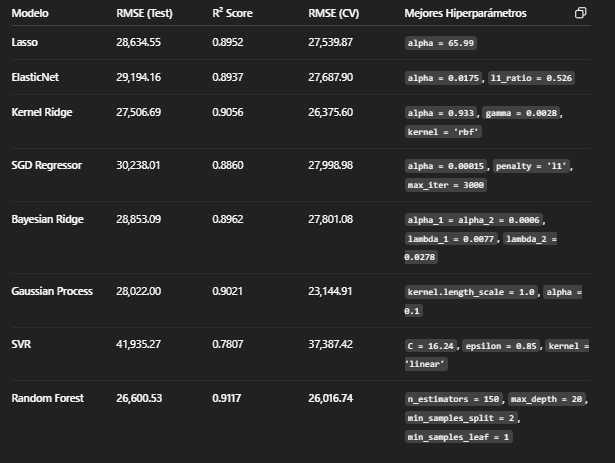

In [ ]:
!pip install scikit-optimize   # Descargar paquete para usar BayesSearch


In [ ]:
#MODELO DE RandomForestRegressor UTILIZANDO BayesSearch
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder # Ensure necessary transformers are imported
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming build_pipeline function and X_train_raw, y_train, X_test_raw, y_test
# and num_cols, cat_cols are defined in previous cells and are in the global scope.
# If not, ensure they are loaded or defined before this cell.

# Re-using the build_pipeline function that handles all preprocessing steps (numerical + categorical)
# This ensures consistency with the other models evaluated.
def build_pipeline(model):
    # Assuming num_cols and cat_cols are defined globally from X_train_raw
    numeric_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_pipeline, num_cols),
        ('cat', categorical_pipeline, cat_cols),
    ])

    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        # Include the to_dense step just in case the model requires dense input
        ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
        ('model', model)
    ])

    return pipeline


# Use the build_pipeline function with RandomForestRegressor
# The pipeline now includes the full preprocessor defined in build_pipeline
pipe_rf = build_pipeline(RandomForestRegressor(random_state=42, n_jobs=-1))

# Espacio de búsqueda más compacto
# Define the parameter space relative to the 'model' step in the pipeline
param_space_rf = {
    "model__n_estimators": (50, 150),
    "model__max_depth": (5, 30),
    "model__min_samples_split": (2, 6),
    "model__min_samples_leaf": (1, 4)
}

# Optimización bayesiana más liviana
bayes_search_rf = BayesSearchCV(
    pipe_rf, # Use the pipeline created with build_pipeline
    param_space_rf,
    n_iter=15,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=1, # Keep at 1 or adjust based on system capabilities
    random_state=42,
    verbose=0
)

# Entrenamiento - Use X_train_raw and y_train (the raw data)
# The pipeline handles the preprocessing steps automatically before fitting the model
bayes_search_rf.fit(X_train_raw, y_train)

# Evaluación en test - Use X_test_raw and y_test (the raw data)
y_pred = bayes_search_rf.predict(X_test_raw)

# Calculate MSE first, then take the square root for RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Resultados
print("========== RESULTADOS RANDOM FOREST REGRESSOR CON BAYESIAN OPTIMIZATION ==========")
print("Mejores parámetros encontrados:", bayes_search_rf.best_params_)
print(f"RMSE en conjunto de prueba: {rmse:.2f}")
print(f"Score (R^2): {r2:.4f}")
# The best_score_ from BayesSearchCV is the average score from cross-validation on the training data
print(f"Neg RMSE from BayesSearchCV: {bayes_search_rf.best_score_:.2f}")
print(f"RMSE from BayesSearchCV (absolute): {-bayes_search_rf.best_score_:.2f}")



Para esta prueba, se observa que este resultado es sorprendentemente más bajo en desempeño que el obtenido por GridSearchCV y RandomizedSearchCV para RandomForestRegressor, lo cual no es común pero puede pasar por varias razones:

Espacio de búsqueda diferente o insuficiente, Menor número de iteraciones, Sobreajuste al CV score.

Tras evaluar y comparar múltiples modelos de regresión los tres modelos con mejor desempeño fueron:

Random Forest Regressor, Kernel Ridge Regressor y Gaussian Process Regressor.

**EJERCICIO 3**

En este ejercicio, se creara un Dashboard utlizando el paquete Streamlit. El cual permitira visualizar de forma intuitiva el Dataset y comparar el rendimiento de los 3 mejores modelos de regresión del punto anterior.

In [ ]:
# Crear archivo base del dashboard
contenido = '''
import streamlit as st

# Título
st.title("🏠 Dashboard de Predicción de Precios de Vivienda")

# Subtítulo
st.subheader("Proyecto de Machine Learning con el dataset Ames Housing")

# Texto de bienvenida
st.write("""
Bienvenido al dashboard interactivo del proyecto.
Aquí podrás:
- Explorar los datos del conjunto Ames Housing.
- Visualizar estadísticas y gráficos.
- Consultar los mejores modelos entrenados.
- Realizar predicciones personalizadas.
""")
'''

# Escribir archivo app.py
with open("app.py", "w") as f:
    f.write(contenido)

print("✅ Archivo app.py creado correctamente")



En esta celda de código se creo el archivo app.py para la creación del Dashboard.

In [ ]:
#from google.colab import files     #Descargar el archivo.
#files.download("app.py")


Aqui semplemente se descargo la aplicacion app.py que sera subido al GitHub.

En el Github, estará el archivo app.y con el siguiente link: https://5ukhmcnuwgj6x7ncu42bcp.streamlit.app/

Se podra visualiar el codigo del Dashboard. En el se puede ver que los modelos  de **Kernel Ridge Regressor** y **Gaussian Process Regressor** no predicen valores de la vivienda. Solo el modelo de **Random forest** funcionó bien.

Pienso que los modelos mencionados no funcioanron debido a que hubo un mal entrenamiento por parte de ellos a la hora de hacer la predicción. Pues el Kernel siempre marca 0 y el Gaussian process ni siquiera se pudo cargar.

**NOTA:** En el GitHub, se puede observar que subí la base de datos AmesHousing para trabajar mejor y también hay un archivo que contiene unos requerimientos (librerias) que se utilizaron para la creación del Dashboard.

In [ ]:
#instalación de librerías
!pip install streamlit -q

Se añade el codigo de app.y hecho en Streamlit.

In [ ]:
import streamlit as st

# ===================== TÍTULO Y DESCRIPCIÓN =====================
st.set_page_config(page_title="Predicción de Precio de Viviendas - Ames", layout="centered")

st.title("🏡 Predicción de Precio de Viviendas - AmesHousing")

st.markdown("""
Este dashboard presenta un análisis del conjunto de datos *AmesHousing*, utilizado para desarrollar modelos de regresión que predicen el precio de venta de una vivienda.

*Objetivos:*
- Explorar y procesar los datos.
- Comparar el rendimiento de diferentes modelos de regresión.
- Usar un modelo entrenado para realizar predicciones interactivas.

Los tres modelos con mejor rendimiento fueron:
- 🌲 *Random Forest Regressor*
- 🧮 *Kernel Ridge Regressor*
- 🌐 *Gaussian Process Regressor*
""")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ===================== CARGA DE DATOS =====================
@st.cache_data
def cargar_datos():
    url = "https://raw.githubusercontent.com/Leandro2402-bit/TAM/main/AmesHousing.csv"
    return pd.read_csv(url)

df = cargar_datos()

# ===================== VISUALIZACIONES =====================
st.subheader("📊 Análisis Exploratorio de Datos")

# Histograma de SalePrice
st.markdown("### Distribución del Precio de Venta")
fig1, ax1 = plt.subplots()
sns.histplot(df['SalePrice'], bins=40, kde=True, ax=ax1)
st.pyplot(fig1)

# Mapa de calor de correlación (solo numéricas)
st.markdown("### Mapa de Correlaciones")
num_df = df.select_dtypes(include=['int64', 'float64'])
corr = num_df.corr(numeric_only=True)
fig2, ax2 = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5, ax=ax2)
st.pyplot(fig2)

# Top 10 variables más correlacionadas con SalePrice
st.markdown("### Variables Más Correlacionadas con el Precio")
top_corr = corr['SalePrice'].drop('SalePrice').abs().sort_values(ascending=False).head(10)
st.bar_chart(top_corr)

# ===================== COMPARACIÓN DE MODELOS =====================

# Importar pandas para crear tablas
import pandas as pd

# Mostrar título de la sección
st.header("📊 Comparación de Modelos de Regresión")

# Crear un diccionario con las métricas de cada modelo (extraídas de tus tablas comparativas)
metricas_modelos = {
    "Modelo": ["Random Forest", "Kernel Ridge", "Gaussian Process"],
    "MAE": [15112.41, 16985.84, 16312.68],          # Error absoluto medio
    "RMSE": [23479.05, 24523.56, 24015.44],         # Raíz del error cuadrático medio
    "R²": [0.9292, 0.9221, 0.9256]                  # Coeficiente de determinación
}

# Convertir el diccionario en un DataFrame de pandas
df_metricas = pd.DataFrame(metricas_modelos)

# Mostrar la tabla de métricas en el dashboard
st.dataframe(df_metricas.style.format({
    "MAE": "{:,.2f}",
    "RMSE": "{:,.2f}",
    "R²": "{:.4f}"
}))

# ===================== MÉTRICAS DE EVALUACIÓN =====================

# Subtítulo para la nueva sección
st.subheader("📏 ¿Qué significan las métricas de evaluación?")

# Texto explicativo con Markdown
st.markdown("""
Para evaluar la calidad de los modelos de regresión, se usan estas tres métricas principales:

### 🔢 MAE – Error Absoluto Medio (Mean Absolute Error)
- Mide el *promedio de los errores absolutos* entre los precios reales y los predichos.
- *Fácil de interpretar*: un MAE de 15,000 indica un error promedio de $15,000.
- *No penaliza demasiado los errores grandes*.

### 🔢 RMSE – Raíz del Error Cuadrático Medio (Root Mean Squared Error)
- Calcula la *raíz cuadrada del promedio de los errores al cuadrado*.
- Penaliza más los *errores grandes* que el MAE.
- Si el RMSE es 23,000, en promedio el error es de unos $23,000, con énfasis en errores grandes.

### 📈 R² – Coeficiente de Determinación
- Mide cuánta *proporción de la variación del precio* puede explicar el modelo.
- R² = 1.0 → Predicción perfecta.
- R² = 0.0 → No es mejor que predecir el promedio.
- R² < 0 → El modelo es peor que adivinar el valor medio.

---
Estas métricas permiten entender si el modelo predice bien y en qué magnitud se equivoca.
""")

# ===================== Prediccion interactiva =====================

import pandas as pd
import numpy as np
import joblib
import gdown
import os

# --- URLS de los modelos en Drive ---
urls = {
    "Random Forest": "https://drive.google.com/uc?id=1tDd35bq8W_MoL5UabRR29esliSANYw35",
    "Kernel Ridge": "https://drive.google.com/uc?id=1rJqTDNebuv6fOnECRSI_jF4XrdvSr2Nj"
}

# --- Cargar modelo si no está en disco ---
def load_model(model_name, url):
    filename = f"{model_name.replace(' ', '_')}.pkl"
    if not os.path.exists(filename):
        gdown.download(url, filename, quiet=False)
    return joblib.load(filename)

# --- Selección de modelo ---
st.title("🏠 Predicción de Precios de Vivienda - AmesHousing")
modelo_seleccionado = st.selectbox("🔍 Selecciona un modelo para predecir:", list(urls.keys()))
modelo = load_model(modelo_seleccionado, urls[modelo_seleccionado])

# --- Lista de campos importantes a mostrar ---
campos_clave = {
    "Overall Qual": {"tipo": "slider", "min": 1, "max": 10, "recomendacion": "Calidad general del material y acabado"},
    "Gr Liv Area": {"tipo": "number", "recomendacion": "Área habitable sobre el nivel del suelo (en pies²)"},
    "Garage Cars": {"tipo": "slider", "min": 0, "max": 4, "recomendacion": "Número de carros que caben en el garaje"},
    "Total Bsmt SF": {"tipo": "number", "recomendacion": "Área total del sótano (en pies²)"},
    "Year Built": {"tipo": "number", "recomendacion": "Año de construcción de la casa"},
    "Full Bath": {"tipo": "slider", "min": 0, "max": 4, "recomendacion": "Número de baños completos"},
    "1st Flr SF": {"tipo": "number", "recomendacion": "Área del primer piso (en pies²)"},
    "Garage Area": {"tipo": "number", "recomendacion": "Área del garaje (en pies²)"},
    "Kitchen Qual": {
        "tipo": "select",
        "opciones": ["Ex", "Gd", "TA", "Fa", "Po"],
        "recomendacion": "Calidad de la cocina (Ex: Excelente, Gd: Buena, TA: Típica, Fa: Regular, Po: Pobre)"
    },
    "Neighborhood": {
        "tipo": "select",
        "opciones": ["NridgHt", "CollgCr", "Crawfor", "Somerst", "OldTown", "Mitchel", "NWAmes", "Sawyer"],
        "recomendacion": "Vecindario donde está ubicada la casa"
    }
}

# --- Recolección de inputs amigables ---
st.markdown("### 📝 Ingresa los datos principales de la vivienda")
input_data = {}
for campo, config in campos_clave.items():
    st.markdown(f"**{campo}** — _{config['recomendacion']}_")

    if config["tipo"] == "slider":
        input_data[campo] = st.slider(f"Selecciona valor para {campo}", min_value=config["min"], max_value=config["max"], value=config["min"])
    elif config["tipo"] == "number":
        input_data[campo] = st.number_input(f"Ingresa valor para {campo}", min_value=0, step=10)
    elif config["tipo"] == "select":
        input_data[campo] = st.selectbox(f"Selecciona opción para {campo}", config["opciones"])
    st.markdown("---")

# --- Botón de predicción ---
if st.button("🔮 Predecir Precio"):
    try:
        df = pd.DataFrame([input_data])
        # Completamos el resto de columnas que espera el modelo con ceros o valores nulos
        for col in modelo.feature_names_in_:
            if col not in df.columns:
                df[col] = 0
        df = df[modelo.feature_names_in_]  # Asegurar el orden correcto

        pred = modelo.predict(df)[0]
        st.success(f"💵 Precio estimado: ${pred:,.2f}")
    except Exception as e:
        st.error(f"❌ Error al predecir: {e}")